<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 177.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 214.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 150.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 165.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 178.1 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here

# Check missing values
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

# Handling missing data
df['Employment'] = df['Employment'].fillna('Unknown')
df['JobSat'] = df['JobSat'].fillna('No Response')
df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')


Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [4]:
df['JobSat'].unique()


array(['No Response', 8.0, 5.0, 10.0, 6.0, 9.0, 4.0, 7.0, 3.0, 2.0, 1.0,
       0.0], dtype=object)

Median Job Satisfaction by Experience Range:
ExperienceRange
0–5      7.0
5–10     7.0
10–20    7.0
20+      8.0
Name: JobSat_clean, dtype: float64


/tmp/ipykernel_298/76222897.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat_clean'].median()


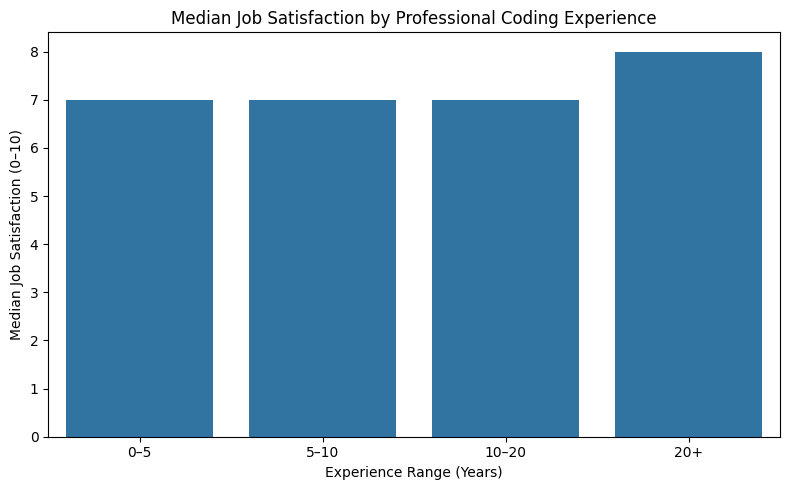

In [5]:


# Step 1: Clean YearsCodePro

def clean_years(x):
    if pd.isna(x):
        return None
    if x == 'Less than 1 year':
        return 0
    if x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro_num'] = df['YearsCodePro'].apply(clean_years)


# Step 2: Convert JobSat to numeric

df['JobSat_clean'] = pd.to_numeric(df['JobSat'], errors='coerce')


# Step 3: Create Experience Ranges

bins = [0, 5, 10, 20, 100]
labels = ['0–5', '5–10', '10–20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro_num'], bins=bins, labels=labels, right=False)


# Step 4: Calculate Median Job Satisfaction

median_satisfaction = df.groupby('ExperienceRange')['JobSat_clean'].median()
print("Median Job Satisfaction by Experience Range:")
print(median_satisfaction)


# Step 5: Visualization

plt.figure(figsize=(8, 5))
sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values)

plt.title("Median Job Satisfaction by Professional Coding Experience")
plt.xlabel("Experience Range (Years)")
plt.ylabel("Median Job Satisfaction (0–10)")
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


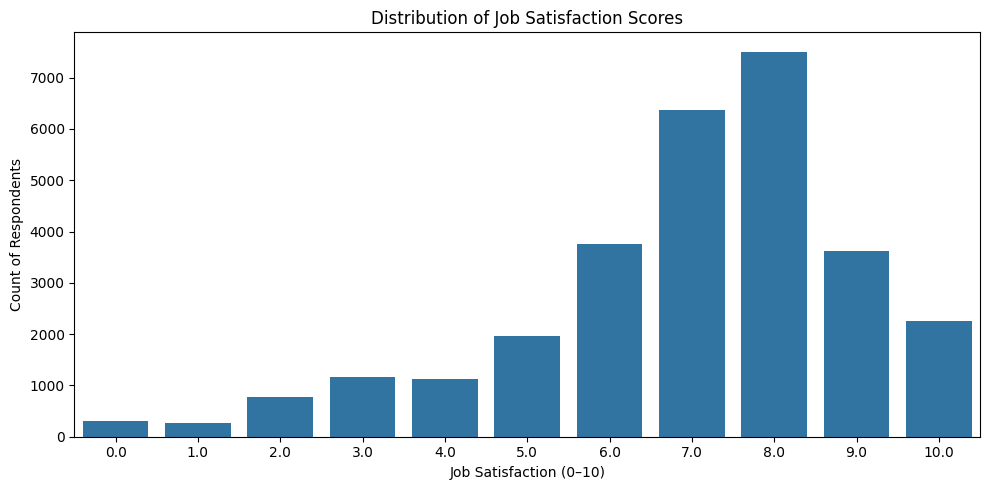

In [7]:
# Convert JobSat to numeric (No Response -> NaN)
df['JobSat_clean'] = pd.to_numeric(df['JobSat'], errors='coerce')

plt.figure(figsize=(10,5))
sns.countplot(x='JobSat_clean', data=df)

plt.title("Distribution of Job Satisfaction Scores")
plt.xlabel("Job Satisfaction (0–10)")
plt.ylabel("Count of Respondents")
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


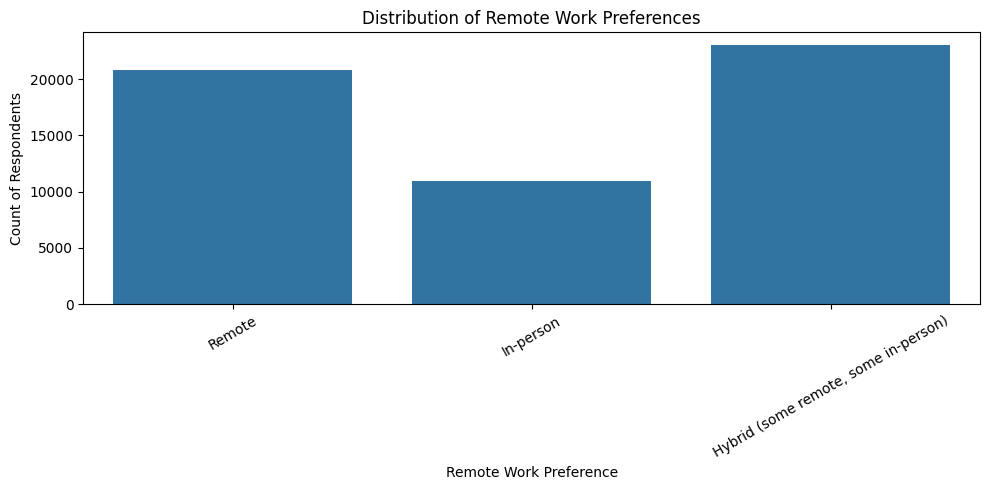


Remote Work Preference vs. Employment Type:
RemoteWork_clean                                    Hybrid (some remote, some in-person)  \
Employment_clean                                                                           
Employed, full-time                                                                17281   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but looking fo...                                     2   
Student, full-time;Not employed, bu

In [9]:

# Basic Cleaning – Convert problematic strings to NaN
# -----------------------------------------
df['RemoteWork_clean'] = df['RemoteWork'].replace(['No Response', 'Unknown'], pd.NA)
df['Employment_clean'] = df['Employment'].replace(['No Response', 'Unknown'], pd.NA)
df['DevType_clean'] = df['DevType'].replace(['No Response', 'Unknown'], pd.NA)


# STEP A: Count Plot for Remote Work Distribution
# -----------------------------------------
plt.figure(figsize=(10,5))
sns.countplot(x='RemoteWork_clean', data=df)

plt.title("Distribution of Remote Work Preferences")
plt.xlabel("Remote Work Preference")
plt.ylabel("Count of Respondents")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# STEP B: Cross-tabulate Remote Work by Employment Type
# -----------------------------------------
remote_vs_employment = pd.crosstab(df['Employment_clean'], df['RemoteWork_clean'])
print("\nRemote Work Preference vs. Employment Type:")
print(remote_vs_employment)

# Optional: Normalize to percentages
remote_vs_employment_pct = pd.crosstab(df['Employment_clean'], df['RemoteWork_clean'], normalize="index") * 100
print("\nPercentage Distribution of Remote Work Preference by Employment Type:")
print(remote_vs_employment_pct.round(2))


# STEP C: Cross-tabulate Remote Work by Job Role (DevType)
# -----------------------------------------
# NOTE: DevType may contain multiple job roles separated by semicolons.
# This split helps count roles more accurately.

df_exploded = df.assign(DevType_split=df['DevType_clean'].str.split(';')).explode('DevType_split')

remote_vs_role = pd.crosstab(df_exploded['DevType_split'], df_exploded['RemoteWork_clean'])
print("\nRemote Work Preference by Job Role:")
print(remote_vs_role)

# Optional: Percentage version
remote_vs_role_pct = pd.crosstab(df_exploded['DevType_split'], df_exploded['RemoteWork_clean'], normalize='index') * 100
print("\nPercentage Distribution of Remote Work Preference by Job Role:")
print(remote_vs_role_pct.round(2))

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_298/85197563.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LanguageList'] = df['LanguageHaveWorkedWith'].str.split(';')


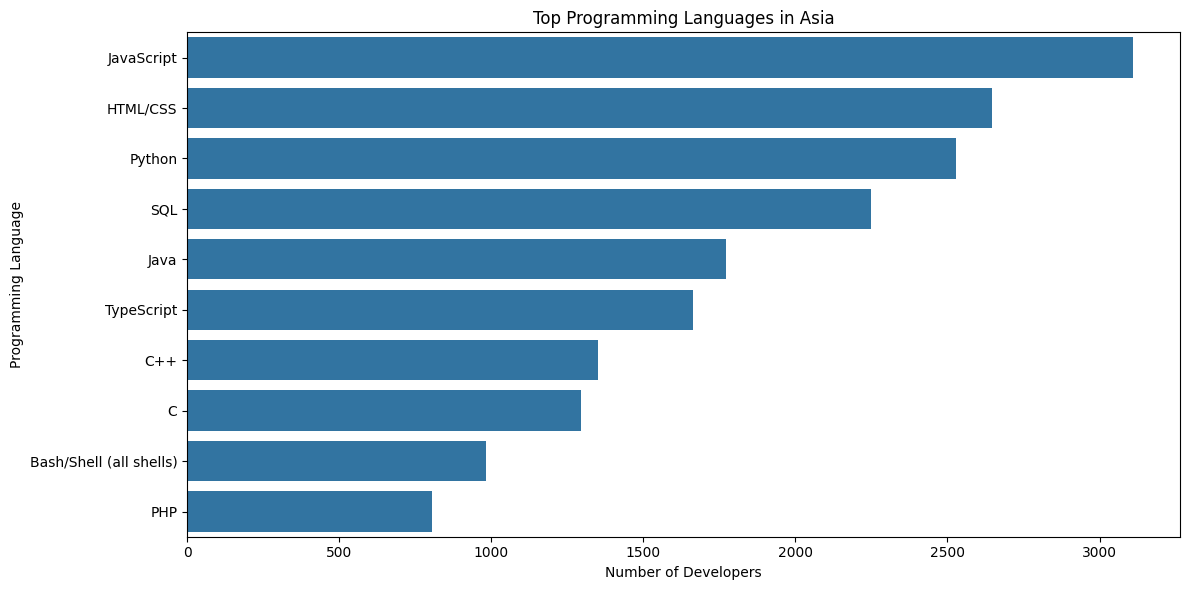

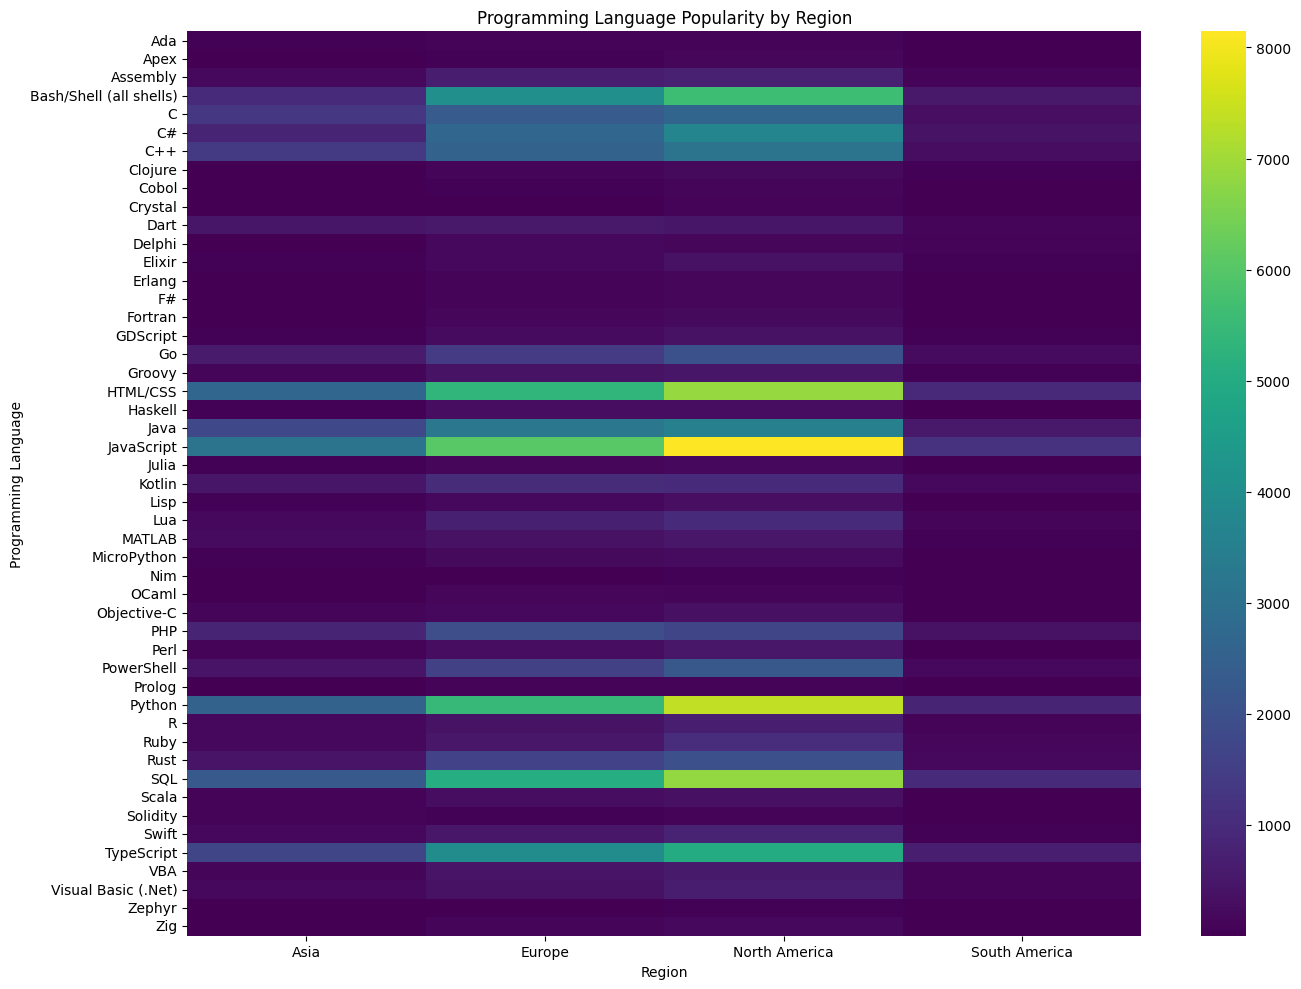

In [10]:
# Step 1 — Create Region Mapping
# ---------------------------------------
region_map = {
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'United States of America': 'North America',
    'Canada': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Germany': 'Europe',
    'France': 'Europe',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    # Add more mappings if required
}

df['Region'] = df['Country'].map(region_map)

# Filter out rows where region couldn't be assigned
df = df[df['Region'].notna()]

# ---------------------------------------
# Step 2 — Split Multi-language Column
# ---------------------------------------
df['LanguageList'] = df['LanguageHaveWorkedWith'].str.split(';')

# ---------------------------------------
# Step 3 — Explode into Separate Rows
# ---------------------------------------
exploded = df.explode('LanguageList')

# ---------------------------------------
# Step 4 — Count Languages by Region
# ---------------------------------------
lang_region_counts = (
    exploded.groupby(['Region', 'LanguageList'])
            .size()
            .reset_index(name='Count')
)

# ---------------------------------------
# Step 5 — Get Top Languages per Region
# Example: Asia
# ---------------------------------------
top_asia = (
    lang_region_counts[lang_region_counts['Region'] == 'Asia']
            .sort_values('Count', ascending=False)
            .head(10)
)

# ---------------------------------------
# Visualization 1 — Bar Plot for Asia
# ---------------------------------------
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_asia,
    x='Count',
    y='LanguageList'
)
plt.title("Top Programming Languages in Asia")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.tight_layout()
plt.show()

# ---------------------------------------
# Visualization 2 — Heatmap (Languages vs Regions)
# ---------------------------------------
pivot = lang_region_counts.pivot(
    index='LanguageList',
    columns='Region',
    values='Count'
).fillna(0)

plt.figure(figsize=(14,10))
sns.heatmap(pivot, cmap='viridis')
plt.title("Programming Language Popularity by Region")
plt.ylabel("Programming Language")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Correlation between Years of Experience and Job Satisfaction: 0.10416445370612276


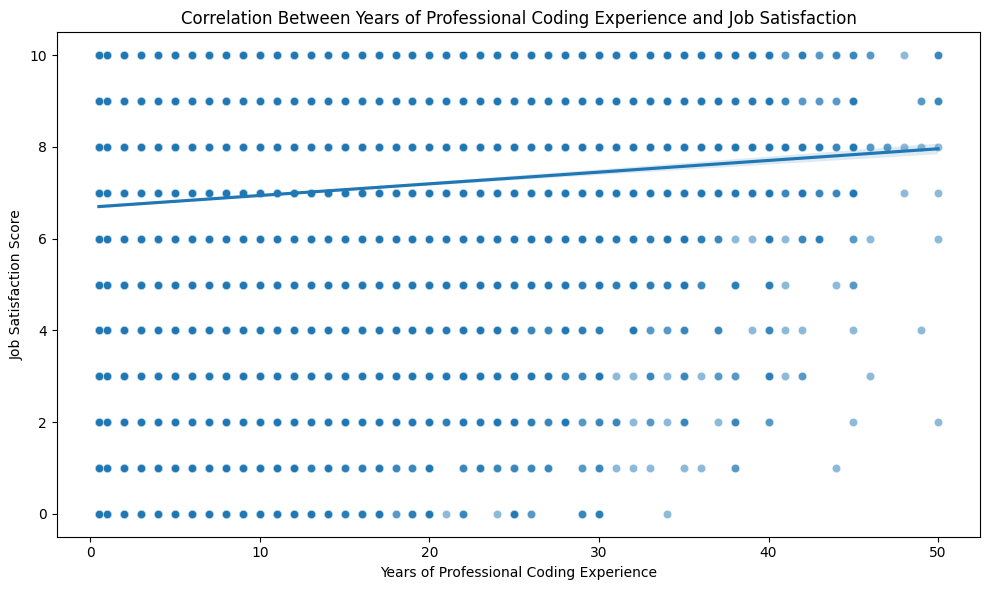

In [12]:
# Step 8 — Correlation Between Experience and Satisfaction

# Clean YearsCodePro column (convert to numeric)
# --------------------------------------------------
def clean_years(x):
    if pd.isna(x):
        return None
    if x == "Less than 1 year":
        return 0.5
    if x == "More than 50 years":
        return 50
    try:
        return float(x)
    except:
        return None

df["YearsCodePro_clean"] = df["YearsCodePro"].apply(clean_years)

# --------------------------------------------------
# Clean Job Satisfaction column
# --------------------------------------------------
df["JobSatPoints_1"] = pd.to_numeric(df["JobSat"], errors='coerce')

# Drop missing values
df_clean = df.dropna(subset=["YearsCodePro_clean", "JobSatPoints_1"])

# --------------------------------------------------
# Correlation Calculation
# --------------------------------------------------
correlation = df_clean["YearsCodePro_clean"].corr(df_clean["JobSatPoints_1"])
print("Correlation between Years of Experience and Job Satisfaction:", correlation)

# --------------------------------------------------
# Scatter Plot
# --------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x="YearsCodePro_clean",
    y="JobSatPoints_1",
    alpha=0.5
)
sns.regplot(
    data=df_clean,
    x="YearsCodePro_clean",
    y="JobSatPoints_1",
    scatter=False
)
plt.title("Correlation Between Years of Professional Coding Experience and Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction Score")
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Cross-tabulation:

Employment_simple                                   Employed  Not employed
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                     1766            27
Bachelor’s degree (B.A., B.S., B.Eng., etc.)           24688           254
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        15387           170
Primary/elementary school                               1089            57
Professional degree (JD, MD, Ph.D, Ed.D, etc.)          2845           125
Secondary school (e.g. American high school, Ge...      5683           110
Some college/university study without earning a...      7523           128
Something else                                           838            94

Percentage Distribution by Education Level:

Employment_simple                                    Employed  Not employed
EdLevel                                                                    
Associate degree (A.A., A.S., etc

<Figure size 1200x800 with 0 Axes>

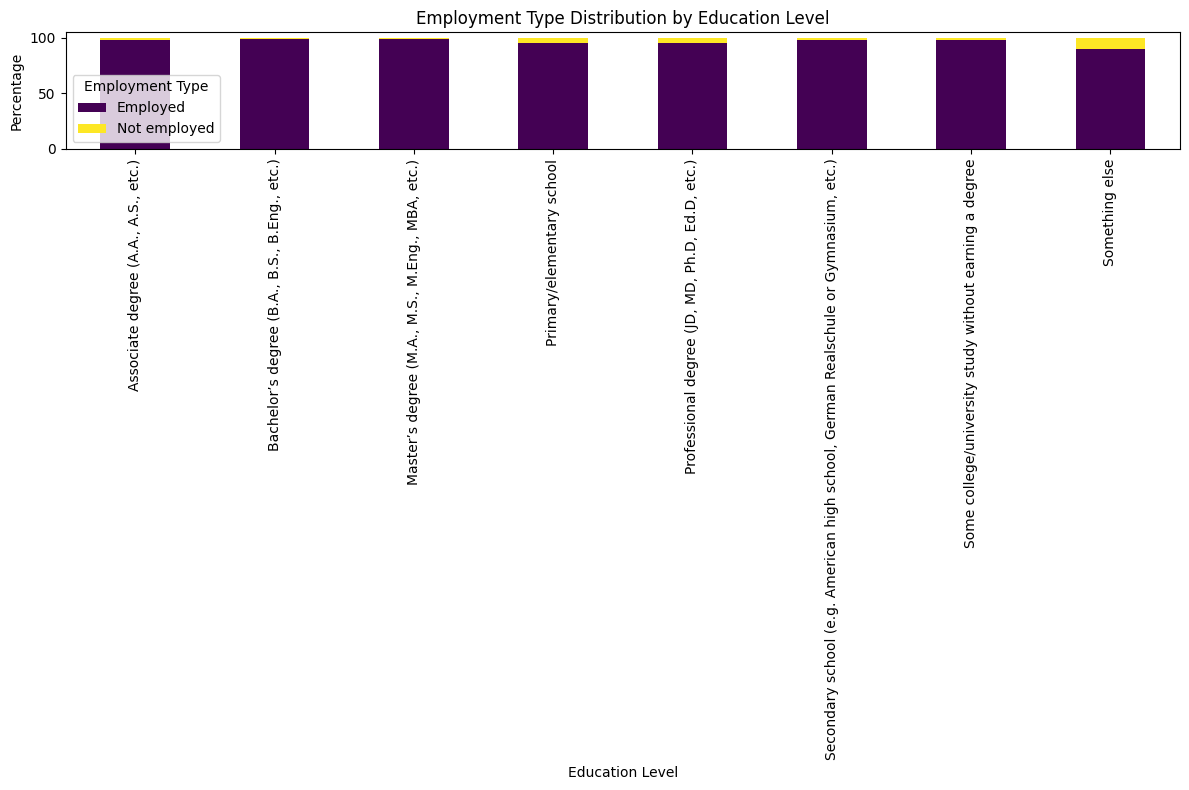

In [13]:
def simplify_employment(x):
    if pd.isna(x):
        return "Not employed"
    x = str(x).lower()
    if "employed" in x or "full-time" in x or "part-time" in x or "independent" in x:
        return "Employed"
    return "Not employed"

df["Employment_simple"] = df["Employment"].apply(simplify_employment)

# ---------------------------------------
# Drop missing EdLevel entries
# ---------------------------------------
df_clean = df.dropna(subset=["EdLevel"])

# ---------------------------------------
# Cross-tabulation
# ---------------------------------------
crosstab = pd.crosstab(df_clean["EdLevel"], df_clean["Employment_simple"])
print("Cross-tabulation:\n")
print(crosstab)

# Normalized (percentage) version
crosstab_normalized = pd.crosstab(df_clean["EdLevel"], df_clean["Employment_simple"], normalize='index') * 100

print("\nPercentage Distribution by Education Level:\n")
print(crosstab_normalized)

# ---------------------------------------
# Visualization — Bar Plot
# ---------------------------------------
plt.figure(figsize=(12, 8))
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title("Employment Type Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Percentage")
plt.legend(title="Employment Type")
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [15]:
# Step 10: Save the dataset
output_file = "cleaned_survey_data.csv"

df.to_csv(output_file, index=False)

print(f"Dataset saved successfully as: {output_file}")

Dataset saved successfully as: cleaned_survey_data.csv


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
